In [30]:
# 임포트
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np
import pandas as pd

In [16]:
# 이미지 전처리 함수
def preimg(img):
    
    th1 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 5)
    
    return 255-cv2.resize(th1, (256,256), interpolation=cv2.INTER_AREA)

상의끝
1
10751.jpg
1
11274.jpg
1
11275.jpg
1
11277.jpg
1
12810.jpg
1
12811.jpg
1
15608.jpg
1
15611.jpg
1
15612.jpg
1
15622.jpg
1
15632.jpg
1
15642.jpg
1
15643.jpg
1
17902.jpg
1
17903.jpg
1
17926.jpg
1
17927.jpg
1
17928.jpg
1
17929.jpg
1
17930.jpg
1
17931.jpg
1
2306.jpg
1
2719.jpg
1
2720.jpg
1
2722.jpg
1
28519.jpg
1
28520.jpg
1
28521.jpg
1
28522.jpg
1
30604.jpg
1
30605.jpg
1
30616.jpg
1
30617.jpg
1
30651.jpg
1
38570.jpg
1
38572.jpg
1
38573.jpg
1
38574.jpg
1
38575.jpg
1
38576.jpg
1
38577.jpg
1
39745.jpg
1
39749.jpg
1
39750.jpg
1
39752.jpg
1
39753.jpg
1
39755.jpg
1
39756.jpg
1
39758.jpg
1
39759.jpg
1
44625.jpg
1
44627.jpg
1
4906.jpg
1
4939.jpg
1
4940.jpg
1
4949.jpg
1
4950.jpg
1
4952.jpg
1
4977.jpg
1
4978.jpg
1
4989.jpg
1
5001.jpg
1
5003.jpg
1
5014.jpg
1
5015.jpg
1
5017.jpg
1
5018.jpg
1
5457.jpg
1
5458.jpg
1
6519.jpg
1
6521.jpg
1
6522.jpg
1
6523.jpg
1
6524.jpg
1
6525.jpg
1
6526.jpg
1
6527.jpg
1
6536.jpg
1
6564.jpg
1
6588.jpg
1
7486.jpg
1
7487.jpg
1
7488.jpg
1
7489.jpg
1
7490.jpg
1
7491.jpg
1


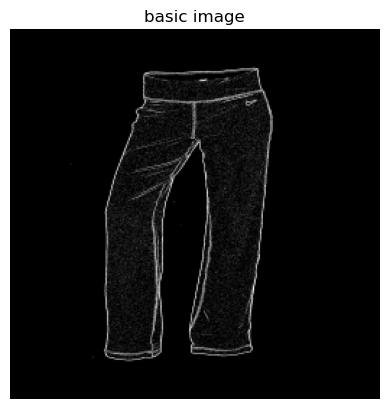

In [25]:
# 데이터 들어옴

input_dir = "./image/" # 상의경로
input_dir2 = "./image_bottom/" # 하의경로

if not os.path.exists(input_dir) :
    os.mkdir(input_dir)

if not os.path.exists(input_dir2) :
    os.mkdir(input_dir2)    

arr_top = []
arr_bot = []
    
# 이미지 불러오기
file_list = os.listdir(input_dir) # 상의
file_list2 = os.listdir(input_dir2) # 하의

for file in file_list : # 상의 리스트
    
    img_gray = cv2.imread(input_dir + file, cv2.IMREAD_GRAYSCALE)

    img1 = preimg(img_gray)
    
    arr_top.append(np.hstack(img1))
      

        
for file in file_list2 : # 하의 리스트
    
    img_gray = cv2.imread(input_dir2 + file, cv2.IMREAD_GRAYSCALE)

    img1 = preimg(img_gray)
    
    arr_bot.append(np.hstack(img1))

plt.title("basic image")
plt.imshow(img1, cmap = "gray")
plt.axis("off")
plt.show()

In [26]:
arr_top = np.array(arr_top)
arr_bot = np.array(arr_bot)

In [28]:
data=np.vstack((arr_top,arr_bot))

In [31]:
img_df = pd.DataFrame(data)
img_df

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
res = []
for i in range(0,100):
    res.append(1)

In [34]:
for i in range(0,100):
    res.append(0)

In [35]:
res_df = pd.DataFrame(res)
res_df

,0
0,1
1,1
2,1
3,1
4,1
...,...
195,0
196,0
197,0
198,0


In [37]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier # 분류 모델
# 정확도 측정 도구
from sklearn.metrics import accuracy_score


from lightgbm import LGBMClassifier

from lightgbm import early_stopping
from lightgbm import log_evaluation
import joblib

In [50]:
model = joblib.load('./model.pkl')

In [51]:
pre = model.predict(img_df)
accuracy_score(pre, res_df)

0.91

In [54]:
pre

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)